# DS 5001 Module 9 Lab: FastText

We create word embeddings with novel data using word2vec and visualize results with tSNE.

# Set Up

In [1]:
data_home = '../data'
data_prefix = 'novels'

In [2]:
OHCO = ['book_id','chap_id','para_num','sent_num','token_num']

In [4]:
import pandas as pd
import numpy as np
from gensim.models import FastText
from sklearn.manifold import TSNE
import plotly_express as px

# Get Data

In [5]:
SENTS = pd.read_csv(f'{data_home}/{data_prefix}/{data_prefix}-GENSIM_DOCS.csv').set_index(OHCO[:-1])
SENTS.columns = ['token_list']
VOCAB = pd.read_csv(f'{data_home}/{data_prefix}/{data_prefix}-VOCAB.csv').set_index('term_str').sort_index()
VSIG = VOCAB.sort_values('dfidf', ascending=False).head(1000)

In [6]:
SENTS.head()

token_list
book_id    chap_id para_num sent_num                                                   
adventures 1       0        1                         ['a', 'scandal', 'in', 'bohemia']
                   1        0                                                     ['i']
                   2        0         ['to', 'sherlock', 'holmes', 'she', 'is', 'alw...
                            1         ['i', 'have', 'seldom', 'heard', 'him', 'menti...
                            2         ['in', 'his', 'eyes', 'she', 'eclipses', 'and'...

In [7]:
VOCAB.head()

,n,pos_max,pos_group,df,dfidf
term_str,,,,,
a,28533,DT,DT,320,0.000000
aback,9,NN,NN,9,46.368028
abaft,2,IN,IN,1,8.321928
abandon,44,VB,VB,28,98.408049
abandoned,68,VBN,VB,43,124.513524


# Learn Embeddings

In [69]:
ft_params = dict(
    vector_size=100,
    window=2,
    min_count=1,
    sentences=SENTS.token_list.tolist(),
    epochs=10
)

In [70]:
model = FastText(**ft_params)
FT = pd.DataFrame([model.wv[w] for w in VSIG.index], index=VSIG.index).join(VSIG) 

In [71]:
FT

,0,1,2,3,4,5,6,7,8,9,...,95,96,97,98,99,n,pos_max,pos_group,df,dfidf
term_str,,,,,,,,,,,,,,,,,,,,,
order,-0.000953,-0.000431,-0.001431,0.003673,0.000090,-0.002039,-0.000582,-0.000964,-0.003441,-0.001096,...,-0.001126,0.001470,-0.001231,0.000141,0.000583,227,NN,NN,118,169.835635
become,0.001966,-0.001052,0.001667,0.002065,-0.001468,-0.000297,-0.001304,-0.001659,-0.000328,-0.002478,...,0.001457,-0.001576,0.000340,-0.000142,-0.000022,218,VBN,VB,118,169.835635
written,-0.000481,-0.000447,0.000717,-0.001727,0.001142,0.000237,-0.000702,-0.001326,-0.000873,0.001438,...,0.000128,0.000960,0.000905,0.000931,-0.002566,214,VBN,VB,118,169.835635
curiosity,-0.000340,-0.000320,0.000659,0.000761,0.000373,0.001059,-0.000992,0.001114,-0.001776,0.001158,...,0.000406,0.000646,-0.000525,0.000070,0.001719,208,NN,NN,118,169.835635
yours,-0.000257,-0.000160,-0.000174,-0.001160,-0.000972,0.002132,-0.002577,-0.000257,0.001576,-0.000703,...,-0.000083,0.000402,0.001332,0.000900,-0.001735,198,NN,NN,118,169.835635
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
cried,0.002144,-0.001158,-0.001306,0.001055,0.001248,0.002195,-0.000433,-0.001370,0.001825,-0.001630,...,-0.001707,0.000322,0.000413,0.001757,-0.000775,610,VBD,VB,178,150.622650
due,-0.000386,0.002728,0.000490,0.003010,0.000782,0.000939,0.000439,0.003842,-0.002203,-0.000348,...,-0.002293,-0.002233,-0.000564,-0.001367,0.001507,79,JJ,JJ,66,150.317242
sky,0.002678,-0.003758,0.002387,-0.000310,-0.000245,-0.000719,-0.003775,0.001313,0.000269,0.001781,...,-0.002166,0.004352,-0.000077,0.000959,0.000136,87,NN,NN,66,150.317242


In [72]:
# model.wv.key_to_index

# Visualize

In [73]:
tsne_params = dict(
    learning_rate = 200., #'auto' or [10.0, 1000.0]
    perplexity = 25,
    n_components = 2,
    init = 'random', # 'pca'
    n_iter = 2500,
    random_state = 23
)

In [74]:
tsne_engine = TSNE(**tsne_params)
tsne_model = tsne_engine.fit_transform(FT.iloc[:, :model.vector_size])

In [75]:
COORDS = pd.DataFrame(tsne_model, columns=['x', 'y'], index=FT.index)

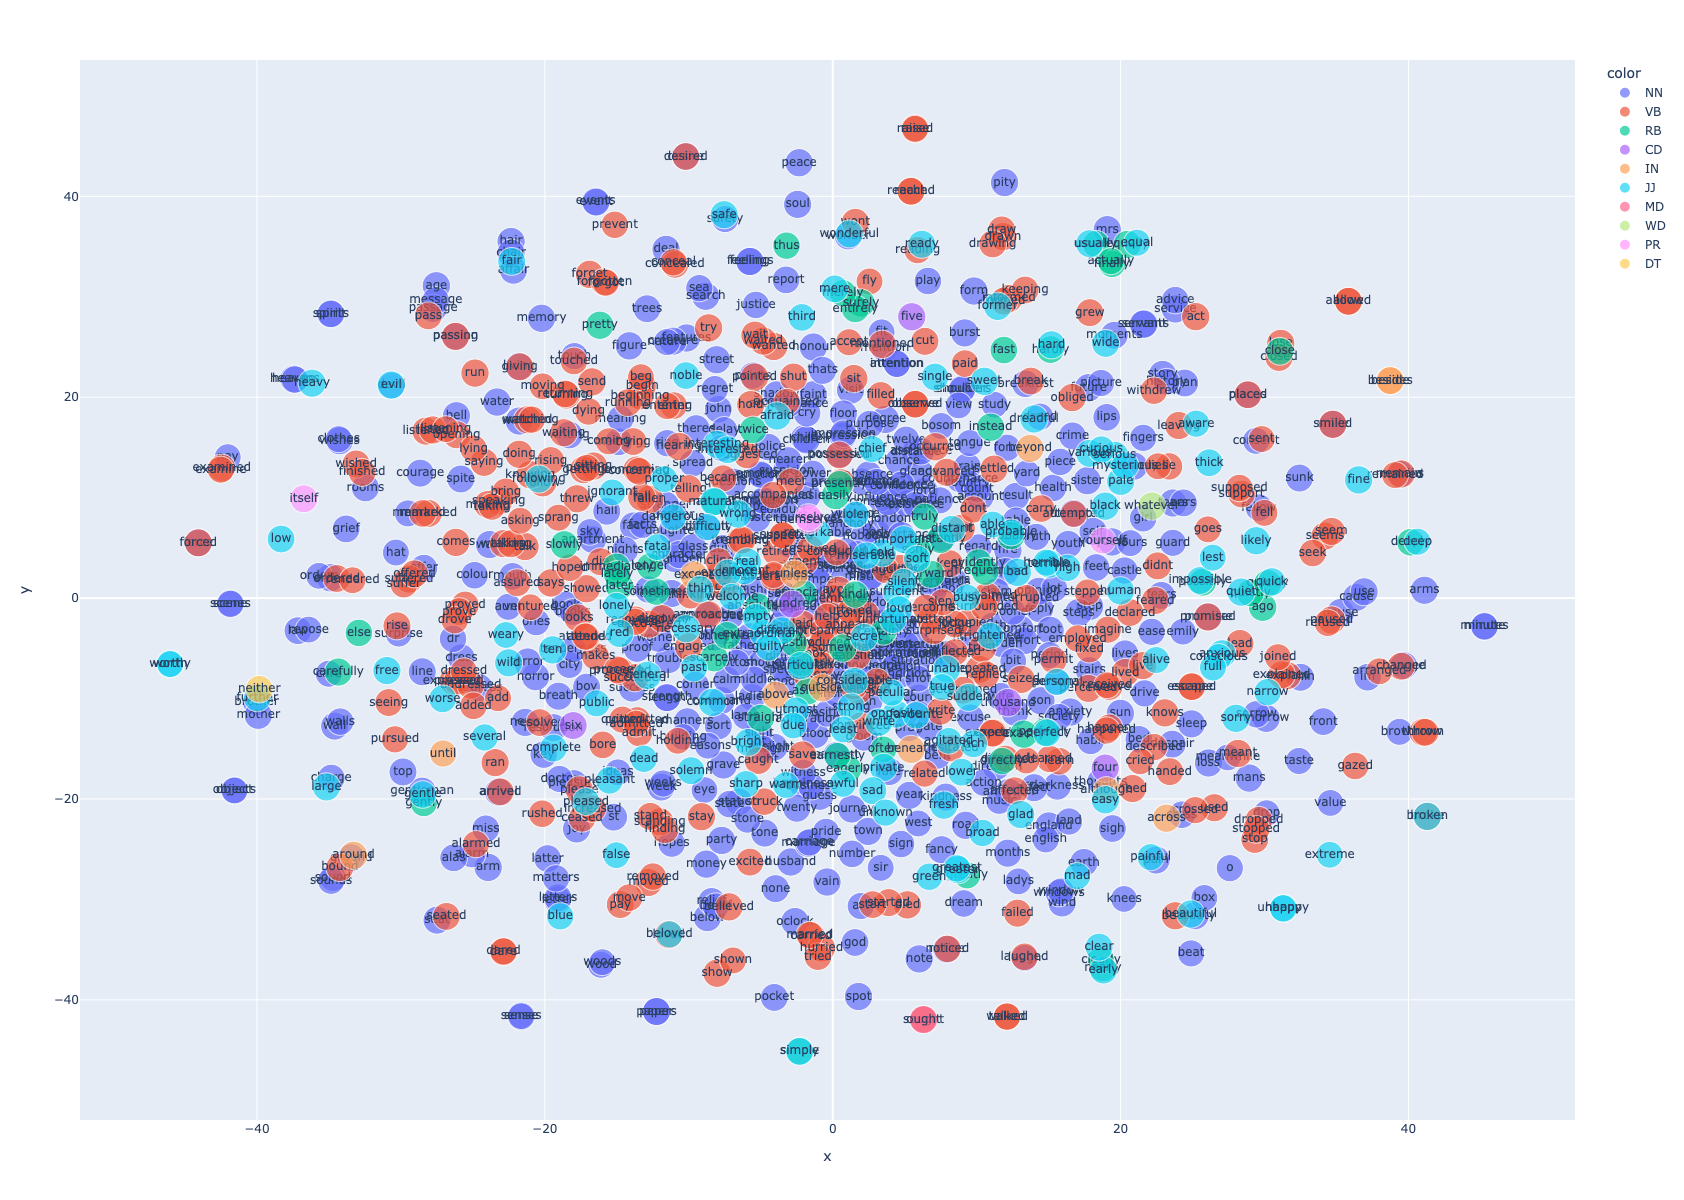

In [76]:
px.scatter(COORDS.reset_index(), 'x', 'y', 
           text='term_str', color=FT.pos_group, size=FT.dfidf,
           hover_name='term_str',
           height=1200)

## Semantic Algebra

### Analogies

$A : B :: C : D? \rightarrow B - A + C = D$


In [14]:
def complete_analogy(A, B, C, n=2):
    try:
        cols = ['term', 'sim']
        return pd.DataFrame(model.wv.most_similar(positive=[B, C], negative=[A])[:n], columns=cols)
    except KeyError as e:
        print('Error:', e)
        return None
    
def get_most_similar(positive, negative=None):
    return pd.DataFrame(model.wv.most_similar(positive, negative), columns=['term', 'sim'])

In [15]:
complete_analogy('man', 'boy', 'woman', 3)

,term,sim
0,z,0.848510
1,á,0.681439
2,ö,0.601074


In [16]:
complete_analogy('girl', 'daughter', 'boy', 3)

,term,sim
0,á,0.756484
1,é,0.600273
2,z,0.584302


In [17]:
complete_analogy('girl', 'sister', 'boy', 3)

,term,sim
0,á,0.984906
1,î,0.939709
2,é,0.919971


In [18]:
complete_analogy('man', 'gentleman', 'woman', 5)

,term,sim
0,î,0.514006
1,ö,0.332841
2,ï,0.302014
3,y,0.288372
4,á,0.283218


In [19]:
complete_analogy('woman', 'lady', 'man', 5)

,term,sim
0,ñ,0.336631
1,ó,0.304740
2,w,0.259626
3,ç,0.239800
4,h,0.230470


In [20]:
complete_analogy('day', 'sun', 'night', 5)

,term,sim
0,j,0.826445
1,ï,0.794538
2,x,0.788761
3,p,0.779807
4,ö,0.772131


### Similarites

In [21]:
get_most_similar('joy')

,term,sim
0,î,0.243278
1,ó,0.178189
2,ç,0.150414
3,ñ,0.125776
4,ê,0.088460
5,i,0.076151
6,a,0.048684
7,á,0.043764
8,à,-0.000409
9,ë,-0.000936


In [22]:
get_most_similar('man')

,term,sim
0,w,0.948378
1,g,0.929383
2,k,0.920918
3,t,0.916256
4,d,0.909566
5,s,0.899410
6,m,0.888040
7,c,0.874203
8,n,0.865744
9,[,0.849148


In [23]:
get_most_similar(['woman','girl'], ['man'])

,term,sim
0,u,0.816704
1,o,0.651468
2,e,0.623092
3,i,0.621967
4,a,0.614517
5,],0.531918
6,y,0.510317
7,r,0.343284
8,l,0.317680
9,',0.283740


In [24]:
get_most_similar(positive=['man'], negative=['woman'])

,term,sim
0,w,0.448720
1,h,0.380224
2,k,0.340316
3,ñ,0.314130
4,t,0.310142
5,[,0.288413
6,g,0.282435
7,ó,0.249186
8,,0.233529
9,',0.233371


In [25]:
get_most_similar(positive=['woman'], negative=['girl'])

,term,sim
0,x,0.970714
1,ï,0.887913
2,ô,0.882405
3,j,0.875974
4,z,0.861626
5,è,0.838357
6,ö,0.830667
7,â,0.827456
8,p,0.823990
9,é,0.820552


In [26]:
get_most_similar(positive='woman')

,term,sim
0,],0.851192
1,j,0.838881
2,p,0.819761
3,y,0.786211
4,c,0.729439
5,b,0.725187
6,l,0.709669
7,r,0.687652
8,q,0.686252
9,m,0.684584


In [27]:
get_most_similar('woman')

,term,sim
0,],0.851192
1,j,0.838881
2,p,0.819761
3,y,0.786211
4,c,0.729439
5,b,0.725187
6,l,0.709669
7,r,0.687652
8,q,0.686252
9,m,0.684584


In [28]:
get_most_similar(['woman'],['marriage'])

,term,sim
0,j,0.877085
1,p,0.838181
2,],0.759793
3,x,0.746838
4,q,0.703592
5,y,0.672657
6,b,0.663023
7,z,0.645548
8,c,0.630090
9,f,0.611062


In [29]:
get_most_similar(['woman'],['lady'])

,term,sim
0,j,0.821105
1,p,0.776070
2,],0.763010
3,x,0.703847
4,z,0.660883
5,y,0.648503
6,q,0.627127
7,b,0.584399
8,c,0.576454
9,l,0.553398


In [30]:
get_most_similar(['man'],['gentleman'])

,term,sim
0,p,0.536422
1,],0.533120
2,c,0.513500
3,q,0.511727
4,b,0.507525
5,j,0.499910
6,d,0.474092
7,m,0.472724
8,f,0.472555
9,l,0.459709


## Save

In [31]:
W2V = pd.DataFrame(model.wv.vectors_norm, index=model.wv.vocab.keys())
W2V.to_csv('{}/{}-W2V.csv'.format(data_out, data_prefix))
pd.Series(DOCS).to_csv('{}/{}-GENSIM_DOCS.csv'.format(data_out, data_prefix), index=False, header=False)

AttributeError: The `.vectors_norm` attribute is computed dynamically since Gensim 4.0.0. Use `.get_normed_vectors()` instead.
See https://github.com/RaRe-Technologies/gensim/wiki/Migrating-from-Gensim-3.x-to-4